<a href="https://colab.research.google.com/github/maanuhb/Trabajo_Practico_02/blob/main/Mapas_cuantitativos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import warnings
!pip install geopandas
!pip install rioxarray
#!pip install esda
!pip install pysal
!pip install contextily
!pip install matplotlib_scalebar
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
from matplotlib_scalebar.scalebar import ScaleBar
import pandas  # Tabular data manipulation
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation
#from pysal.explore import esda  # Exploratory Spatial analytics
#from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

In [71]:
DB01 = geopandas.read_file(
    "https://raw.githubusercontent.com/maanuhb/Trabajo_Practico_02/main/DBRedVial.geojson"
).set_index("fid").to_crs(32619) 
DB02 = geopandas.read_file(
    "https://raw.githubusercontent.com/maanuhb/Trabajo_Practico_02/d61b5d487f90e62b6efdd2628ebfa997e0118e5d/DBTrabajoPractico02.geojson"
).set_index("fid").to_crs(32619) 



In [6]:
db1 = (geopandas.GeoDataFrame(DB01))
db1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4262 entries, 1 to 4262
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Layer       4259 non-null   object  
 1   ID          4254 non-null   object  
 2   F_CODE      4262 non-null   object  
 3   ACC         4262 non-null   object  
 4   ACC_DESC    4262 non-null   object  
 5   EXS         4262 non-null   object  
 6   EXS_DES     4262 non-null   object  
 7   NOM         82 non-null     object  
 8   NOM1        52 non-null     object  
 9   NOM2        0 non-null      object  
 10  UBI         0 non-null      object  
 11  UBI_DESC    0 non-null      object  
 12  NC          0 non-null      object  
 13  TRS         4247 non-null   object  
 14  TRS_DESC    4247 non-null   object  
 15  SEP         0 non-null      object  
 16  SEP_DESC    0 non-null      object  
 17  COD_MOP     4244 non-null   object  
 18  TRAM        4218 non-null   object  
 19

Text(0.1, 0.19999999999999998, 'N')

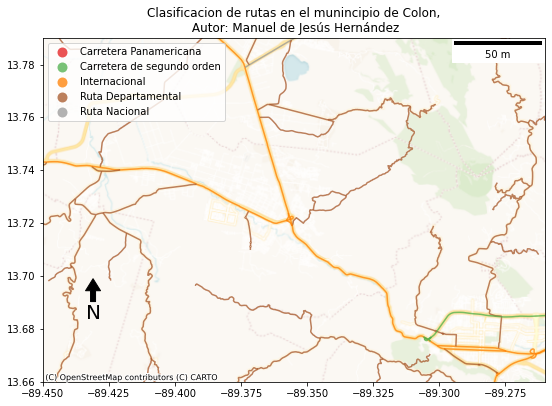

In [82]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
plt.title("Clasificacion de rutas en el munincipio de Colon,\n Autor: Manuel de Jesús Hernández")
# Build choropleth
db1.plot(
    column="Layer",
    cmap="Set1",
    edgecolor="white",
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    categorical=1,
    ax=ax,
)
#Escala
scalebar = ScaleBar(1.5, "km")
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(
    ax,
    crs=db1.crs,
    zoom =12,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
#centrar municipio
plt.xlim(-89.45,-89.26)
plt.ylim(13.66,13.79)
x, y, arrow_length = 0.1, 0.3, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

In [49]:
db2 = (geopandas.GeoDataFrame(DB02))
db2["Densidad_Poblacional_Año_2011"]=db2['_dig_POB_2011']/db2['areaAREA_KM2']
db2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 1 to 271
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   NOM_DPTO                       262 non-null    object  
 1   COD_DPTO                       262 non-null    object  
 2   NOM_MUN                        262 non-null    object  
 3   COD_MUN                        262 non-null    object  
 4   COD_MUN4                       262 non-null    object  
 5   TASA_POBR                      262 non-null    float64 
 6   POBR_FISDL                     262 non-null    object  
 7   POB_TOTAL                      262 non-null    int64   
 8   POB_HOMB                       262 non-null    int64   
 9   POB_MUJER                      262 non-null    int64   
 10  _dig_Codigo_Municipio_Alf      262 non-null    int64   
 11  _dig_Municipio                 262 non-null    object  
 12  _dig_POB_2008               

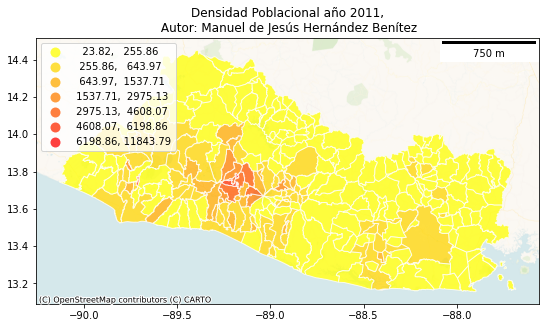

In [86]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
plt.title("Densidad Poblacional año 2011,\n Autor: Manuel de Jesús Hernández Benítez")
# Build choropleth
db2.plot(
    column="Densidad_Poblacional_Año_2011",
    cmap="autumn_r",
    edgecolor="white",
    alpha=0.75,
    scheme="FisherJenks",
    k=7,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

#Escala
scalebar = ScaleBar(1.5, "km")
ax.add_artist(scalebar)

# Add basemap
contextily.add_basemap(
    ax,
    crs=db2.crs,
    zoom =12,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)

As in the previous chapter, we require a spatial weights matrix to implement our statistic. Here, we will use eight nearest neighbors for the sake of the example, but the discussion in the earlier chapter on weights applies in this context, and other criteria would be valid too. We also row-standardize them:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


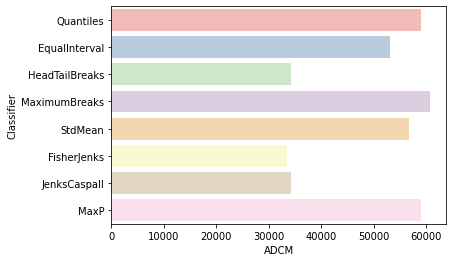

In [85]:
!pip install mapclassify
import mapclassify
import numpy
#Intervalos iguales
ei5 = mapclassify.EqualInterval(db2["Densidad_Poblacional_Año_2011"], k=5)
ei5
#Cuantiles
q5 = mapclassify.Quantiles(db2.Densidad_Poblacional_Año_2011, k=5)
q5
#Mean standard deviation
msd = mapclassify.StdMean(db2["Densidad_Poblacional_Año_2011"])
msd

mb5 = mapclassify.MaximumBreaks(db2["Densidad_Poblacional_Año_2011"], k=5)
mb5
#Boxplot
bp = mapclassify.BoxPlot(db2["Densidad_Poblacional_Año_2011"])
bp

ht = mapclassify.HeadTailBreaks(db2["Densidad_Poblacional_Año_2011"])
ht
#Jenks caspall
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(db2["Densidad_Poblacional_Año_2011"], k=5)
jc5
#FisherJenks
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(db2["Densidad_Poblacional_Año_2011"], k=5)
fj5

mp5 = mapclassify.MaxP(db2["Densidad_Poblacional_Año_2011"], k=5)
mp5
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5
#print(class5)
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

In [ ]:
#print(fits)
#print(adcms)
print(class5)
#print(q5)

(Quantiles               

    Interval       Count
------------------------
[  0.00,   0.00] |    64
(  0.00,  20.42] |    41
( 20.42,  32.63] |    52
( 32.63,  51.64] |    52
( 51.64, 497.78] |    53, EqualInterval           

    Interval       Count
------------------------
[  0.00,  99.56] |   251
( 99.56, 199.11] |     9
(199.11, 298.67] |     1
(298.67, 398.22] |     0
(398.22, 497.78] |     1, HeadTailBreaks          

    Interval       Count
------------------------
[  0.00,  34.07] |   166
( 34.07,  69.29] |    67
( 69.29, 118.39] |    20
(118.39, 197.17] |     7
(197.17, 385.44] |     1
(385.44, 497.78] |     1, MaximumBreaks           

    Interval       Count
------------------------
[  0.00, 100.03] |   251
(100.03, 169.35] |     8
(169.35, 229.60] |     1
(229.60, 385.44] |     1
(385.44, 497.78] |     1, StdMean                 

    Interval       Count
------------------------
(  -inf, -55.54] |     0
(-55.54, -10.73] |     0
(-10.73,  78.87] |   243
( 78.87, 123.68

In [ ]:
# Append class values as a separate column
db["Quantiles"] = q5.yb
db["Equal Interval"] = ei5.yb
db["Head-Tail Breaks"] = ht.yb
db["Maximum Breaks"] = mb5.yb
db["Mean-Standard Deviation"] = msd.yb
db["Fisher-Jenks"] = fj5.yb
db["Jenks Caspall"] = jc5.yb
db["MaxP"] = mp5.yb

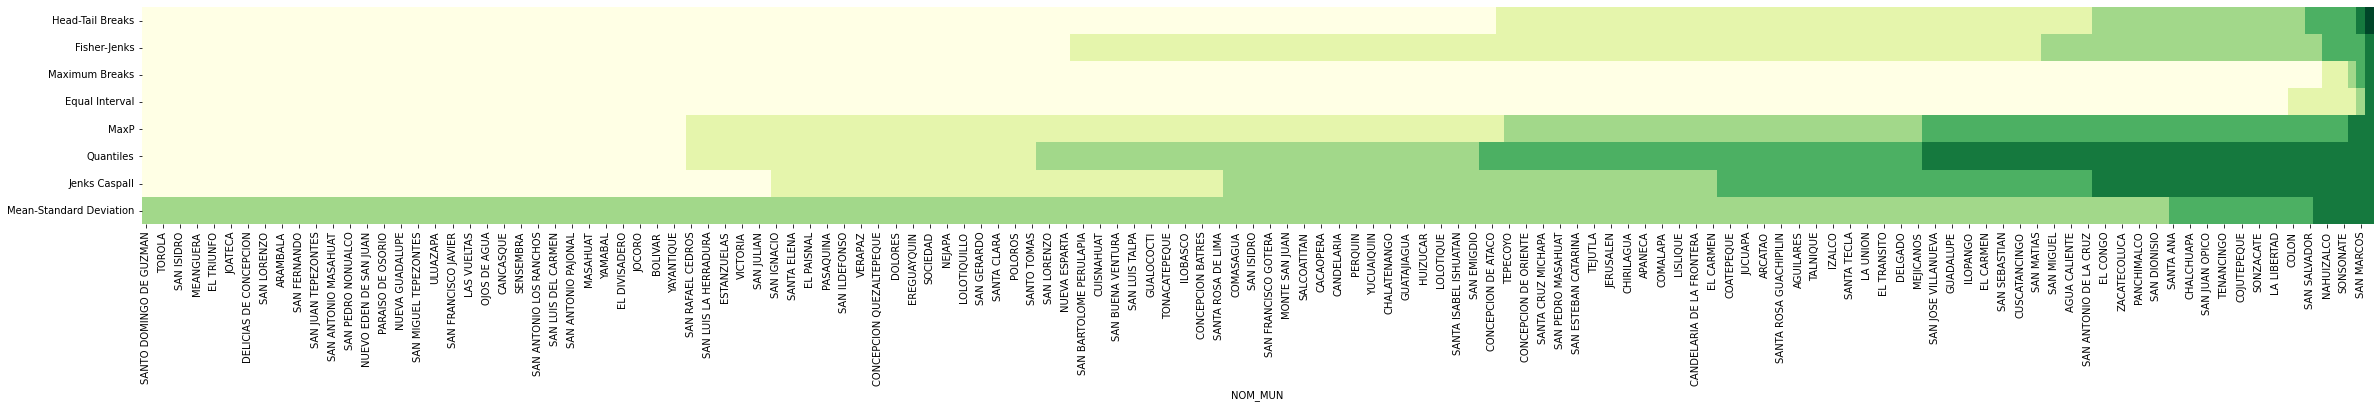

In [ ]:
f, ax = plt.subplots(1, figsize=(40, 4))
seaborn.heatmap(
    db.set_index("NOM_MUN")
    .sort_values("HR2018")[
        [
            "Head-Tail Breaks",
            "Fisher-Jenks",
            "Maximum Breaks",
            "Equal Interval",
            "MaxP",
            "Quantiles",
            "Jenks Caspall",
            "Mean-Standard Deviation",
        ]
    ]
    .T,
    cmap="YlGn",
    cbar=False,
    ax=ax,
)
ax.set_xlabel("NOM_MUN");